   SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0        2126         4          1       1969  215355.283618   
1        2459         3          2       1980  195014.221626   
2        1860         2          1       1970  306891.012076   
3        2294         2          1       1996  206786.787153   
4        2130         5          2       2001  272436.239065   

   Neighborhood_Suburb  Neighborhood_Urban  
0                    0                   0  
1                    0                   0  
2                    1                   0  
3                    0                   1  
4                    1                   0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SquareFeet           50000 non-null  int64  
 1   Bedrooms             50000 non-null  int64  
 2   Bathrooms            50000 non-n

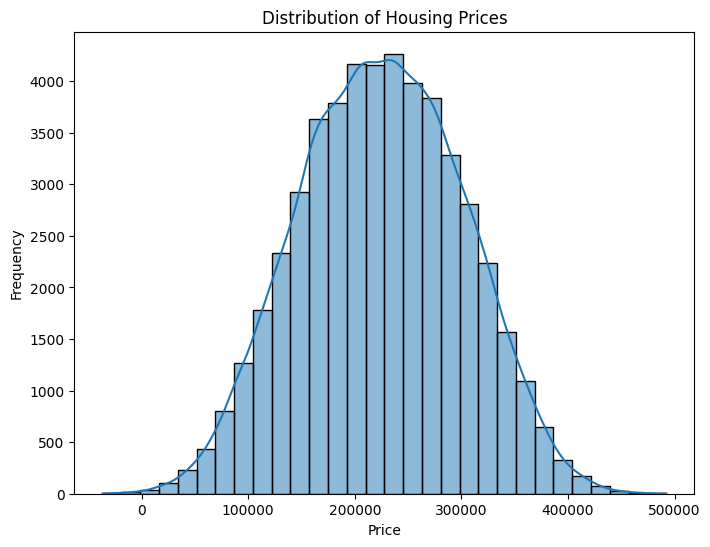

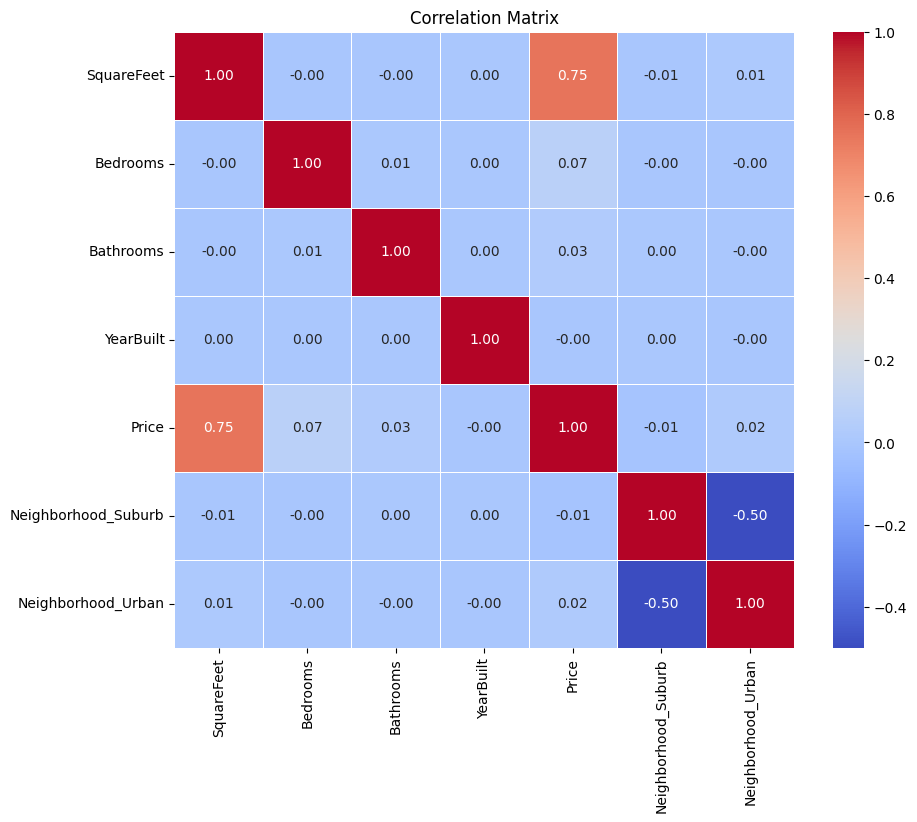

Intercept: 0.537376891461098
Coefficients: [-2.91198617e-06 -2.07490010e-03 -2.13586895e-03 -2.10560245e-05
  9.40732189e-08 -4.99233928e-01]
Mean Squared Error: 0.16601433803163324


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('housing_price_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset
df = pd.get_dummies(df, drop_first=True)
# Perform EDA
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display information about the dataset, including data types and missing values
print(df.describe())  # Display summary statistics of numerical columns

# Visualize the distribution of the target variable (housing prices)
plt.figure(figsize=(8, 6))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)